In [1]:
!unzip image-classification-screening.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import pandas as pd 

import matplotlib.pyplot as plt 

import torch

import torch.nn.functional as F

import torchvision

import torchvision.transforms as transforms


from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
import os

os.getcwd()

# place the files in your IDE working dicrectory .

labels = pd.read_csv(r'train_label.csv')

submission = pd.read_csv(r'sample_submission.csv')


train_path = r'training/'

test_path = r'testing/'

In [3]:
labels.head()

,file_name,label
0,Image_000000.jpg,8
1,Image_000001.jpg,8
2,Image_000002.jpg,8
3,Image_000003.jpg,8
4,Image_000004.jpg,8


In [4]:
labels['label'].value_counts()

6     6285
3     4139
9     3933
7     3664
2     2778
5     2433
8     2338
0     2166
4     2052
10    1039
1      922
Name: label, dtype: int64

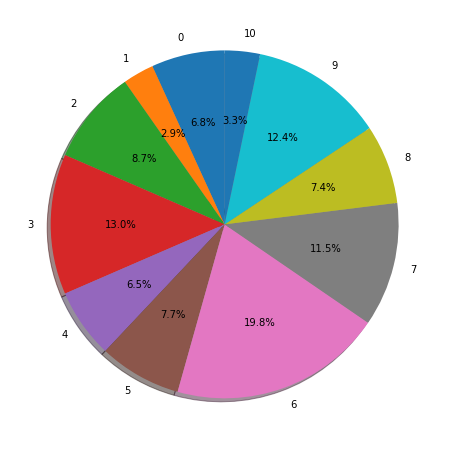

In [5]:
label = 0,1,2,3,4,5,6,7,8,9,10

plt.figure(figsize = (8,8))

plt.pie(labels.groupby('label').size(), labels = label, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

In [6]:
import numpy as np

import matplotlib.pyplot as plt


def imshow(image, ax=None, title=None, normalize=True):

    if ax is None:

        fig, ax = plt.subplots()

    image = image.numpy().transpose((1, 2, 0))


    if normalize:

        mean = np.array([0.485, 0.456, 0.406])

        std = np.array([0.229, 0.224, 0.225])

        image = std * image + mean

        image = np.clip(image, 0, 1)


    ax.imshow(image)

    ax.spines['top'].set_visible(False)

    ax.spines['right'].set_visible(False)

    ax.spines['left'].set_visible(False)

    ax.spines['bottom'].set_visible(False)

    ax.tick_params(axis='both', length=0)

    ax.set_xticklabels('')

    ax.set_yticklabels('')


    return ax

In [23]:
train_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Resize((300,300)),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])


test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Resize((1117,1400)),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])


In [24]:
train_data = torchvision.datasets.ImageFolder(train_path, train_transform )

test_data = torchvision.datasets.ImageFolder(test_path, test_transform )

In [2]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

device

device(type='cpu')

In [27]:
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle=True, num_workers=0)

test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle=False, num_workers=0)

In [28]:
import numpy as np

import matplotlib.pyplot as plt


def imshow(image, ax=None, title=None, normalize=True):

    if ax is None:

        fig, ax = plt.subplots()

    image = image.numpy().transpose((1, 2, 0))


    if normalize:

        mean = np.array([0.485, 0.456, 0.406])

        std = np.array([0.229, 0.224, 0.225])

        image = std * image + mean

        image = np.clip(image, 0, 1)


    ax.imshow(image)

    ax.spines['top'].set_visible(False)

    ax.spines['right'].set_visible(False)

    ax.spines['left'].set_visible(False)

    ax.spines['bottom'].set_visible(False)

    ax.tick_params(axis='both', length=0)

    ax.set_xticklabels('')

    ax.set_yticklabels('')


    return ax

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


training images


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 300, 300])


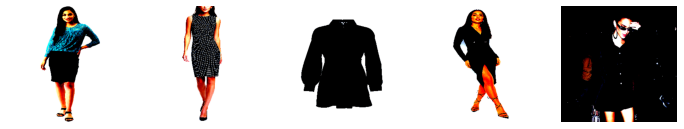

In [29]:
trainimages, trainlabels = next(iter(train_loader))


fig, axes = plt.subplots(figsize=(12, 12), ncols=5)

print('training images')

for i in range(5):

    axe1 = axes[i] 

    imshow(trainimages[i], ax=axe1, normalize=False)


print(trainimages[0].size())

In [58]:
from collections import OrderedDict
input_size = 128
hidden_sizes = [64, 32]
output_size = 10

# Building a feed-forward network
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('logits', nn.Linear(hidden_sizes[1], output_size))]))

In [64]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
images, labels = next(iter(train_loader))
images.resize_(images.size(0), 128)
optimizer.zero_grad()

output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('gradient', model.fc1.weight.grad)
optimizer.step()
print('updated', model.fc1.weight)

gradient tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0096, 0.0096, 0.0096,  ..., 0.0096, 0.0096, 0.0096],
        [0.0401, 0.0402, 0.0402,  ..., 0.0401, 0.0401, 0.0401],
        ...,
        [0.0361, 0.0361, 0.0361,  ..., 0.0361, 0.0361, 0.0361],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0608, 0.0609, 0.0609,  ..., 0.0608, 0.0608, 0.0608]])
updated Parameter containing:
tensor([[-0.0194, -0.0209,  0.0457,  ..., -0.0359, -0.0227, -0.0321],
        [ 0.0079,  0.0768,  0.0819,  ...,  0.0346, -0.0523, -0.0488],
        [ 0.0791,  0.0655,  0.0330,  ..., -0.0538,  0.0720,  0.0174],
        ...,
        [-0.0223,  0.0660,  0.0729,  ..., -0.0094, -0.0174,  0.0690],
        [-0.0804, -0.0841, -0.0312,  ...,  0.0190,  0.0197, -0.0579],
        [-0.0669, -0.0106, -0.0067,  ..., -0.0797, -0.0344,  0.0633]],
       requires_grad=True)


In [ ]:
def validation(model, test_loader, criterion):
    test_loss = 0
    accuracy = 0
    for images, labels in test_loader:

        images.resize_(images.shape[0], 128)

        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return test_loss, accuracy

epochs = 1
steps = 0
running_loss = 0
print_every = 1
for e in range(epochs):
    model.train()
    for images, labels in train_loader:
        steps += 1
        
        # Flattening images into a 784 long vector
        images.resize_(images.size()[0], 128)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            # Making sure network is in eval mode for inference
            model.eval()
            
            # Turning off gradients for validation, saves memory and computations
            with torch.no_grad():
                test_loss, accuracy = validation(model, test_loader, criterion)
                
            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
            
            running_loss = 0
            
            # Making sure training is back on
            model.train()

Epoch: 1/1..  Training Loss: 2.182..  Test Loss: 2.104..  Test Accuracy: 0.887
Epoch: 1/1..  Training Loss: 2.127..  Test Loss: 2.090..  Test Accuracy: 0.899
Epoch: 1/1..  Training Loss: 2.091..  Test Loss: 2.074..  Test Accuracy: 0.911
Epoch: 1/1..  Training Loss: 2.156..  Test Loss: 2.063..  Test Accuracy: 0.919
Epoch: 1/1..  Training Loss: 2.089..  Test Loss: 2.049..  Test Accuracy: 0.925
Epoch: 1/1..  Training Loss: 2.025..  Test Loss: 2.031..  Test Accuracy: 0.935
Epoch: 1/1..  Training Loss: 2.054..  Test Loss: 2.016..  Test Accuracy: 0.939
Epoch: 1/1..  Training Loss: 1.998..  Test Loss: 1.999..  Test Accuracy: 0.944
Epoch: 1/1..  Training Loss: 2.024..  Test Loss: 1.983..  Test Accuracy: 0.947
Epoch: 1/1..  Training Loss: 2.082..  Test Loss: 1.972..  Test Accuracy: 0.949
Epoch: 1/1..  Training Loss: 2.043..  Test Loss: 1.959..  Test Accuracy: 0.951
Epoch: 1/1..  Training Loss: 2.194..  Test Loss: 1.954..  Test Accuracy: 0.951
Epoch: 1/1..  Training Loss: 1.925..  Test Loss: 1.9